# <span style="color:#0b486b">  FIT5215: Deep Learning (2025)</span>
***
*CE/Lecturer (Clayton):*  **Dr Trung Le** | trunglm@monash.edu <br/>
*Lecturer (Clayton):* **A/Prof Zongyuan Ge** | zongyuan.ge@monash.edu <br/>
*Lecturer (Malaysia):*  **Dr Arghya Pal** | arghya.pal@monash.edu <br/>
 <br/>
*Head Tutor 3181:*  **Ms Ruda Nie H** |  \[RudaNie.H@monash.edu \] <br/>
*Head Tutor 5215:*  **Ms Leila Mahmoodi** |  \[leila.mahmoodi@monash.edu \]

<br/> <br/>
Faculty of Information Technology, Monash University, Australia
***

# <span style="color:#0b486b">  Student Information</span>
***
Surname: **[XIAO]**  <br/>
Firstname: **[JINGHAN]**    <br/>
Student ID: **[35636475]**    <br/>
Email: **[jxia0077@student.monash.edu]**    <br/>
Your tutorial time: **[WEB 12:00]**    <br/>
***


# <span style="color:#0b486b">Deep Neural Networks</span>
### Due: <span style="color:red">11:55pm Sunday, 14 September 2025</span>  (Sunday)

#### <span style="color:red">Important note:</span> This is an **individual** assignment. It contributes **20%** to your final mark. Read the assignment instructions carefully.

## <span style="color:#0b486b">What to submit</span>

This assignment is to be completed individually and submitted to Moodle unit site. **By the due date, you are required to submit one  <span style="color:red; font-weight:bold">single zip file, named xxx_assignment01_solution.zip</span> where `xxx` is your student ID, to the corresponding Assignment (Dropbox) in Moodle**. You can use Google Colab to do Assigmnent 1 but you need to save it to an `*.ipynb` file to submit to the unit Moodle.

**More importantly, if you use Google Colab to do this assignment, you need to first make a copy of this notebook on your Google drive**.

***For example, if your student ID is <span style="color:red; font-weight:bold">12356</span>, then gather all of your assignment solution to folder, create a zip file named <span style="color:red; font-weight:bold">123456_assignment01_solution.zip</span> and submit this file.***

Within this zip folder, you **must** submit the following files:
1.	**Assignment01_solution.ipynb**:  this is your Python notebook solution source file.
1.	**Assignment01_output.html**: this is the output of your Python notebook solution *exported* in html format.
1.	Any **extra files or folder** needed to complete your assignment (e.g., images used in your answers).

Since the notebook is quite big to load and work together, one recommended option is to split solution into three parts and work on them seperately. In that case, replace **Assignment01_solution.ipynb** by three notebooks: **Assignment01_Part1_solution.ipynb**, **Assignment01_Part2_solution.ipynb** and **Assignment01_Part3_solution.ipynb**

**You can run your codes on Google Colab. In this case, you have to make a copy of your Google colab notebook including the traces and progresses of model training before submitting.**



## <span style="color:#0b486b">Part 2: Deep Neural Networks (DNN) </span>
<div style="text-align: right"><span style="color:red; font-weight:bold">[Total marks for this part: 25 points]<span></div>

The second part of this assignment is to demonstrate your basis knowledge in deep learning that you have acquired from the lectures and tutorials materials. Most of the contents in this assignment are drawn from **the tutorials covered from weeks 1 to 2**. Going through these materials before attempting this assignment is highly recommended.

In the second part of this assignment, you are going to work with the FashionMNIST dataset for the image recognition task. It has the exact same format as MNIST (70,000 grayscale images of 28 × 28 pixels each with 10 classes), but the images represent fashion items rather than handwritten digits, so each class is more diverse, and the problem is significantly more challenging than MNIST.

In [1]:
import torch
from torch.utils.data import DataLoader
from torchvision import datasets, transforms

torch.manual_seed(1234)

**Load the Fashion MNIST using `torchvision`**

In [2]:
transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.5,), (0.5,))])

train_dataset_orgin = datasets.FashionMNIST(root='./data', train=True, download=True, transform=transform)
test_dataset = datasets.FashionMNIST(root='./data', train=False, download=True, transform=transform)

print(train_dataset_orgin.data.shape, train_dataset_orgin.targets.shape)
print(test_dataset.data.shape, test_dataset.targets.shape)

# Flatten the data
train_dataset_orgin.data = train_dataset_orgin.data.reshape(-1, 28*28)
test_dataset.data = test_dataset.data.reshape(-1, 28*28)

print(train_dataset_orgin.data.shape, train_dataset_orgin.targets.shape)
print(test_dataset.data.shape, test_dataset.targets.shape)

N = len(train_dataset_orgin)
print(f"Number of training samples: {N}")
N_train = int(0.9*N)
N_val = N - N_train
print(f"Number of training samples: {N_train}")
print(f"Number of validation samples: {N_val}")

train_dataset, val_dataset = torch.utils.data.random_split(train_dataset_orgin, [N_train, N_val])


print(len(train_dataset))
print(len(val_dataset))


train_loader = DataLoader(dataset=train_dataset, batch_size=64, shuffle=True)
val_loader = DataLoader(dataset=val_dataset, batch_size=64, shuffle=False)
test_loader = DataLoader(dataset=test_dataset, batch_size=1000, shuffle=False)

100%|██████████| 26.4M/26.4M [00:01<00:00, 16.1MB/s]
100%|██████████| 29.5k/29.5k [00:00<00:00, 272kB/s]
100%|██████████| 4.42M/4.42M [00:00<00:00, 4.97MB/s]
100%|██████████| 5.15k/5.15k [00:00<00:00, 18.1MB/s]

torch.Size([60000, 28, 28]) torch.Size([60000])
torch.Size([10000, 28, 28]) torch.Size([10000])
torch.Size([60000, 784]) torch.Size([60000])
torch.Size([10000, 784]) torch.Size([10000])
Number of training samples: 60000
Number of training samples: 54000
Number of validation samples: 6000
54000
6000


####  <span style="color:red">**Question 2.1:**</span> Write the code to visualize a mini-batch in `train_loader` including its images and labels.

<div style="text-align: right"> <span style="color:red">[5 points]</span> </div>

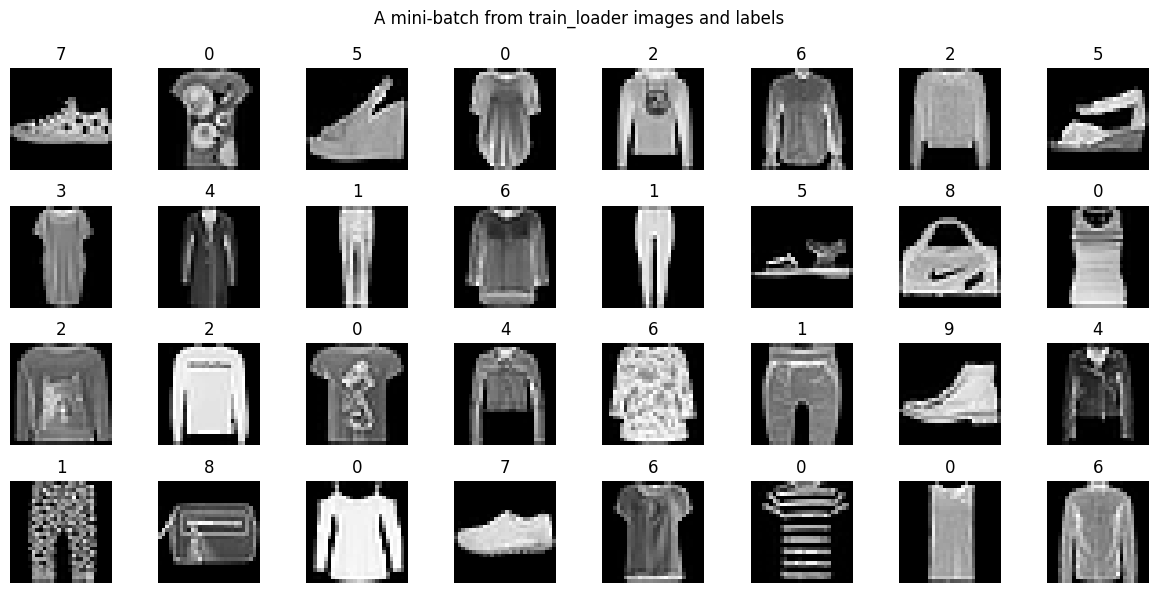

In [3]:
#Your code here
import matplotlib.pyplot as plt

xb, yb = next(iter(train_loader))
xb_flat = xb.view(xb.size(0), -1)
imgs = xb_flat.view(-1, 28, 28)

imgs_show = (imgs * 0.5 + 0.5).clamp(0, 1)

n = min(32, imgs_show.size(0))
rows, cols = 4, 8
plt.figure(figsize=(12, 6))
for i in range(n):
  plt.subplot(rows, cols, i+1)
  plt.imshow(imgs_show[i].cpu(), cmap='gray')
  plt.title(int(yb[i]))
  plt.axis('off')
plt.suptitle("A mini-batch from train_loader images and labels")
plt.tight_layout()
plt.show()




####<span style="color:red">**Question 2.2:**</span> Write the code for the feed-forward neural net using PyTorch

<div style="text-align: right"> <span style="color:red">[5 points]</span> </div>

We now develop a feed-forward neural network with the architecture $784 \rightarrow 40(ReLU) \rightarrow 30(ReLU) \rightarrow 10(softmax)$. You can choose your own way to implement your network and an optimizer of interest. You should train model in $50$ epochs and evaluate the trained model on the test set.

In [4]:
#Your code here
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch import optim
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
torch.manual_seed(1234)
class FFN_40_30(nn.Module):
  def __init__(self):
    super().__init__()
    self.fc1 = nn.Linear(784, 40)
    self.fc2 = nn.Linear(40, 30)
    self.fc3 = nn.Linear(30, 10)

    for m in [self.fc1, self.fc2, self.fc3]:
      nn.init.xavier_uniform_(m.weight)
      nn.init.zeros_(m.bias)

  def forward(self, x):

    x = x.view(x.size(0), -1)
    x = F.relu(self.fc1(x))
    x = F.relu(self.fc2(x))
    logits = self.fc3(x)
    return logits

@torch.no_grad()
def evaluate(model, loader):

    model.eval()
    total_loss, correct, total = 0.0, 0, 0
    for xb, yb in loader:
      xb, yb = xb.to(device), yb.to(device)
      logits = model(xb)
      total_loss += F.cross_entropy(logits, yb, reduction="sum").item()
      pred = logits.argmax(dim=1)
      correct += (pred == yb).sum().item()
      total += yb.numel()
    return total_loss / total, correct / total

def train_ffn_40_30(train_loader, test_loader, epochs=50, lr=0.01, momentum=0.9, wd=0.0):
    model = FFN_40_30().to(device)
    opt = optim.SGD(model.parameters(), lr=lr, momentum=momentum, weight_decay=wd)

    for ep in range(1, epochs + 1):
      model.train()
      for xb, yb in train_loader:
        xb, yb = xb.to(device), yb.to(device)
        logits = model(xb)
        loss = F.cross_entropy(logits, yb)
        opt.zero_grad()
        loss.backward()
        opt.step()

      tr_loss, tr_acc = evaluate(model, train_loader)
      te_loss, te_acc = evaluate(model, test_loader)
      print(f"[Q2.2] Epoch {ep:02d}/{epochs} | "
         f"Train {tr_loss:.4f}/{tr_acc*100:.2f}% | "
         f"Test {te_loss:.4f}/{te_acc*100:.2f}%")
    return model
model_q22 = train_ffn_40_30(train_loader, test_loader, epochs=50, lr=0.01, momentum=0.9)




[Q2.2] Epoch 01/50 | Train 0.4499/83.44% | Test 0.4979/82.08%
[Q2.2] Epoch 02/50 | Train 0.3998/85.28% | Test 0.4468/83.73%
[Q2.2] Epoch 03/50 | Train 0.3393/87.80% | Test 0.3996/85.29%
[Q2.2] Epoch 04/50 | Train 0.3305/87.72% | Test 0.4000/85.49%
[Q2.2] Epoch 05/50 | Train 0.3078/88.65% | Test 0.3825/86.29%
[Q2.2] Epoch 06/50 | Train 0.3018/88.87% | Test 0.3859/86.15%
[Q2.2] Epoch 07/50 | Train 0.2977/88.93% | Test 0.3858/86.01%
[Q2.2] Epoch 08/50 | Train 0.2712/89.93% | Test 0.3632/86.89%
[Q2.2] Epoch 09/50 | Train 0.2960/89.00% | Test 0.4022/85.84%
[Q2.2] Epoch 10/50 | Train 0.2802/89.62% | Test 0.3830/86.58%
[Q2.2] Epoch 11/50 | Train 0.2815/89.48% | Test 0.3913/86.20%
[Q2.2] Epoch 12/50 | Train 0.2503/90.81% | Test 0.3615/87.11%
[Q2.2] Epoch 13/50 | Train 0.2749/89.86% | Test 0.3885/86.56%
[Q2.2] Epoch 14/50 | Train 0.2461/90.82% | Test 0.3780/86.81%
[Q2.2] Epoch 15/50 | Train 0.2387/91.18% | Test 0.3740/87.25%
[Q2.2] Epoch 16/50 | Train 0.2444/90.94% | Test 0.3707/86.71%
[Q2.2] E

####  <span style="color:red">**Question 2.3:**</span> Tuning hyper-parameters with grid search
<div style="text-align: right"> <span style="color:red">[5 points]</span> </div>


Assume that you need to tune the number of neurons on the first and second hidden layers $n_1 \in \{20, 40\}$, $n_2 \in \{20, 40\}$  and the used activation function  $act \in \{sigmoid, tanh, relu\}$. The network has the architecture pattern $784 \rightarrow n_1 (act) \rightarrow n_2(act) \rightarrow 10(softmax)$ where $n_1, n_2$, and $act$ are in their grides. Write the code to tune the hyper-parameters $n_1, n_2$, and $act$. Note that you can freely choose the optimizer and learning rate of interest for this task.

In [5]:
#Your code here

import itertools, copy
ACTS = {
    "sigmoid": nn.Sigmoid(),
    "tanh": nn.Tanh(),
    "relu": nn.ReLU(),
}

class FFN_any(nn.Module):
  def __init__(self, n1, n2, act):
    super().__init__()
    self.act = act
    self.fc1 = nn.Linear(784, n1)
    self.fc2 = nn.Linear(n1, n2)
    self.fc3 = nn.Linear(n2, 10)

    for m in [self.fc1, self.fc2, self.fc3]:
      nn.init.xavier_uniform_(m.weight); nn.init.zeros_(m.bias)
  def forward(self, x):

    x = x.view(x.size(0), -1)
    x = self.act(self.fc1(x))
    x = self.act(self.fc2(x))
    logits = self.fc3(x)
    return logits

def train_one_config(model, train_loader, epochs=20, lr=0.01, momentum=0.9, wd=0.0):
  model.to(device)
  opt = optim.SGD(model.parameters(), lr=lr, momentum=momentum, weight_decay=wd)
  for _ in range(epochs):
    model.train()
    for xb, yb in train_loader:
      xb, yb = xb.to(device), yb.to(device)
      logits = model(xb)
      loss = F.cross_entropy(logits, yb)
      opt.zero_grad(); loss.backward(); opt.step()

search_space = {
    "n1": [20, 40],
    "n2": [20, 40],
    "act": ["sigmoid", "tanh", "relu"],
}
results = []
best = {"acc": -1.0, "state": None, "cfg": None}

for n1, n2, act_name in itertools.product(search_space["n1"], search_space["n2"], search_space["act"]):
  model = FFN_any(n1, n2, ACTS[act_name])
  train_one_config(model, train_loader, epochs=20, lr=0.01, momentum=0.9)
  val_loss, val_acc = evaluate(model, val_loader)
  results.append(((n1, n2, act_name), val_acc))
  if val_acc > best["acc"]:
    best["acc"] = val_acc
    best["state"] = copy.deepcopy(model.state_dict())
    best["cfg"] = {"n1": n1, "n2": n2, "act": act_name}

results_sorted = sorted(results, key=lambda x: x[1], reverse=True)
print("\n[Q2.3] Validation ranking top to bottom):")
for (n1, n2, act_name), acc in results_sorted:
  print(f"n1={n1:>2}, n2={n2:>2}, act={act_name:<7} | Val Acc: {acc*100:.2f}%")

print("\n[Q2.3] Best config:", best["cfg"], "| Val Acc:", f"{best['acc']*100:.2f}%")


best_cfg_q23 = best["cfg"]
best_model_q23 = FFN_any(best_cfg_q23["n1"], best_cfg_q23["n2"], ACTS[best_cfg_q23["act"]]).to(device)
best_model_q23.load_state_dict(best["state"])

test_loss, test_acc = evaluate(best_model_q23, test_loader)
print(f"[Q2.3] Best-on-Test Loss: {test_loss:.4f} | Acc: {test_acc*100:.2f}%")





[Q2.3] Validation ranking top to bottom):
n1=40, n2=40, act=relu    | Val Acc: 88.43%
n1=40, n2=40, act=tanh    | Val Acc: 87.82%
n1=40, n2=20, act=tanh    | Val Acc: 87.73%
n1=40, n2=20, act=relu    | Val Acc: 87.50%
n1=40, n2=40, act=sigmoid | Val Acc: 87.30%
n1=40, n2=20, act=sigmoid | Val Acc: 87.13%
n1=20, n2=40, act=relu    | Val Acc: 86.98%
n1=20, n2=20, act=tanh    | Val Acc: 86.97%
n1=20, n2=40, act=tanh    | Val Acc: 86.53%
n1=20, n2=40, act=sigmoid | Val Acc: 86.42%
n1=20, n2=20, act=sigmoid | Val Acc: 85.88%
n1=20, n2=20, act=relu    | Val Acc: 85.87%

[Q2.3] Best config: {'n1': 40, 'n2': 40, 'act': 'relu'} | Val Acc: 88.43%
[Q2.3] Best-on-Test  Loss: 0.3722 | Acc: 87.32%


####  <span style="color:red">**Question 2.4:**</span> Implement the loss with the form: $loss(p,y)=CE(1_{y},p)+\lambda H(p)$ where $H(p)=-\sum_{i=1}^{M}p_{i}\log p_{i}$ is the entropy of $p$, $p$ is the prediction probabilities of a data point $x$ with the ground-truth label $y$, $1_y$ is an one-hot label, and $\lambda >0$ is a trade-off parameter. Set $\lambda = 0.1$ to train a model.

<div style="text-align: right"> <span style="color:red">[5 points]</span> </div>


In [6]:
#Your code here
def ce_plus_entropy_loss(logits, y, lam=0.1, eps=1e-12):

  p = F.softmax(logits, dim=1)
  logp = torch.log(p.clamp_min(eps))
  ce = F.nll_loss(logp, y, reduction='mean')
  entropy = -(p * logp).sum(dim=1).mean()
  return ce + lam * entropy

# Train for 50 epochs with SGDmomentum
model_q24 = FFN_40_30().to(device)
opt_q24 = optim.SGD(model_q24.parameters(), lr=0.01, momentum=0.9)

for ep in range(1, 51):
  model_q24.train()
  for xb, yb in train_loader:
    xb, yb = xb.to(device), yb.to(device)
    logits = model_q24(xb)
    loss = ce_plus_entropy_loss(logits, yb, lam=0.1)
    opt_q24.zero_grad(); loss.backward(); opt_q24.step()

  tr_loss, tr_acc = evaluate(model_q24, train_loader)
  te_loss, te_acc = evaluate(model_q24, test_loader)
  print(f"[Q2.4] Epoch {ep:02d}/50 | Train {tr_loss:.4f}/{tr_acc*100:.2f}% | "
     f"Test {te_loss:.4f}/{te_acc*100:.2f}%")





[Q2.4] Epoch 01/50 | Train 0.4568/83.38% | Test 0.4980/82.02%
[Q2.4] Epoch 02/50 | Train 0.3823/86.30% | Test 0.4405/84.44%
[Q2.4] Epoch 03/50 | Train 0.3381/87.60% | Test 0.4037/85.64%
[Q2.4] Epoch 04/50 | Train 0.3279/87.93% | Test 0.4076/85.69%
[Q2.4] Epoch 05/50 | Train 0.3164/88.35% | Test 0.4016/85.80%
[Q2.4] Epoch 06/50 | Train 0.3104/88.56% | Test 0.3954/86.12%
[Q2.4] Epoch 07/50 | Train 0.2922/89.23% | Test 0.3813/86.63%
[Q2.4] Epoch 08/50 | Train 0.2949/88.94% | Test 0.3973/86.09%
[Q2.4] Epoch 09/50 | Train 0.3032/88.91% | Test 0.4181/86.31%
[Q2.4] Epoch 10/50 | Train 0.2631/90.31% | Test 0.3805/86.98%
[Q2.4] Epoch 11/50 | Train 0.2601/90.46% | Test 0.3789/86.96%
[Q2.4] Epoch 12/50 | Train 0.2682/90.11% | Test 0.3940/86.93%
[Q2.4] Epoch 13/50 | Train 0.2562/90.44% | Test 0.3894/86.64%
[Q2.4] Epoch 14/50 | Train 0.2799/89.72% | Test 0.4095/86.29%
[Q2.4] Epoch 15/50 | Train 0.2502/90.68% | Test 0.3879/86.78%
[Q2.4] Epoch 16/50 | Train 0.2434/90.89% | Test 0.3912/86.78%
[Q2.4] E

####  <span style="color:red">**Question 2.5:**</span> Experimenting with **sharpness-aware minimization** technique
<div style="text-align: right"> <span style="color:red">[5 points]</span> </div>

Sharpness-aware minimization (SAM) (i.e., [link for main paper](https://openreview.net/pdf?id=6Tm1mposlrM) from Google Deepmind) is a simple yet but efficient technique to improve the generalization ability of deep learning models on unseen data examples. In your research or your work, you might potentially use this idea. Your task is to read the paper and implement *Sharpness-aware minimization (SAM)*. Finally, you need to apply SAM to the best architecture found in **Question 2.3**.   

In [7]:
#Your code here
best_cfg_q23 = {'n1': 40, 'n2': 40, 'act': 'relu'}
def sam_step(model, xb, yb, base_optimizer, rho=0.05, loss_fn=F.cross_entropy, eps=1e-12):
  model.train()
  xb, yb = xb.to(device), yb.to(device)

  #grad at w
  base_optimizer.zero_grad()
  loss = loss_fn(model(xb), yb)
  loss.backward()
  with torch.no_grad():
    grad_sq_sum = 0.0
    for p in model.parameters():
      if p.grad is not None:
        grad_sq_sum += (p.grad**2).sum()
    grad_norm = torch.sqrt(grad_sq_sum + eps)

    e_ws = []
    for p in model.parameters():
      if p.grad is None:
        e_ws.append(None); continue
      e_w = rho * p.grad / (grad_norm + eps)
      p.add_(e_w)
      e_ws.append(e_w)

  #grad at w + ε
  base_optimizer.zero_grad()
  loss_perturbed = loss_fn(model(xb), yb)
  loss_perturbed.backward()

  with torch.no_grad():
    for p, e_w in zip(model.parameters(), e_ws):
      if e_w is not None:
        p.sub_(e_w)
  base_optimizer.step()

  return float(loss.item()), float(loss_perturbed.item())

model_q25 = FFN_any(best_cfg_q23['n1'], best_cfg_q23['n2'], ACTS[best_cfg_q23['act']]).to(device)
opt_q25 = torch.optim.SGD(model_q25.parameters(), lr=0.01, momentum=0.9)

for ep in range(1, 51):
  for xb, yb in train_loader:
    sam_step(model_q25, xb, yb, opt_q25, rho=0.05, loss_fn=F.cross_entropy)

  tr_loss, tr_acc = evaluate(model_q25, train_loader)
  te_loss, te_acc = evaluate(model_q25, test_loader)
  print(f"[Q2.5-SAM] Epoch {ep:02d}/50 | Train {tr_loss:.4f}/{tr_acc*100:.2f}% | "
     f"Test {te_loss:.4f}/{te_acc*100:.2f}%")


[Q2.5-SAM] Epoch 01/50 | Train 0.4186/85.26% | Test 0.4564/83.81%
[Q2.5-SAM] Epoch 02/50 | Train 0.4026/85.36% | Test 0.4451/83.80%
[Q2.5-SAM] Epoch 03/50 | Train 0.3558/87.33% | Test 0.4038/85.48%
[Q2.5-SAM] Epoch 04/50 | Train 0.3488/87.29% | Test 0.4032/85.16%
[Q2.5-SAM] Epoch 05/50 | Train 0.3296/87.78% | Test 0.3915/85.50%
[Q2.5-SAM] Epoch 06/50 | Train 0.3057/88.82% | Test 0.3674/86.58%
[Q2.5-SAM] Epoch 07/50 | Train 0.3006/88.86% | Test 0.3704/86.38%
[Q2.5-SAM] Epoch 08/50 | Train 0.2952/89.15% | Test 0.3628/86.58%
[Q2.5-SAM] Epoch 09/50 | Train 0.2946/89.25% | Test 0.3661/86.62%
[Q2.5-SAM] Epoch 10/50 | Train 0.2785/89.66% | Test 0.3588/87.04%
[Q2.5-SAM] Epoch 11/50 | Train 0.2769/89.83% | Test 0.3593/87.03%
[Q2.5-SAM] Epoch 12/50 | Train 0.2691/90.13% | Test 0.3486/87.40%
[Q2.5-SAM] Epoch 13/50 | Train 0.2818/89.35% | Test 0.3660/86.74%
[Q2.5-SAM] Epoch 14/50 | Train 0.2705/89.92% | Test 0.3617/86.64%
[Q2.5-SAM] Epoch 15/50 | Train 0.2604/90.48% | Test 0.3541/87.11%
[Q2.5-SAM]